<a href="https://colab.research.google.com/github/MaLuisa7/Machine_Learning_Lessons/blob/main/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2 

1. Crear, modificar o eliminar columnas
2. Filtrar registros
3. Crear subconjuntos de datos
4. Crear grupos de datos 

## 0. Preparación de datos

In [46]:
#! pip install yfinance

In [47]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

In [48]:
# GET TODAYS DATE AND CONVERT IT TO A STRING WITH YYYY-MM-DD FORMAT (YFINANCE EXPECTS THAT FORMAT)
ticker = yf.Ticker('SPY')
end_date = '2023-01-23'
start_date = '2018-01-23'
sp500 = ticker.history(start=start_date,end=end_date)
print("Shape of SP 500 data is:", sp500.shape)
sp500.head(2)

Shape of SP 500 data is: (1258, 8)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2018-01-23 00:00:00-05:00,259.592941,260.400902,259.253236,260.097931,97084700,0.0,0.0,0.0
2018-01-24 00:00:00-05:00,260.768177,261.392529,258.766653,259.996948,134816100,0.0,0.0,0.0


In [49]:
sp500.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-01-19 00:00:00-05:00,389.359985,391.079987,387.260010,388.640015,86958900,0.0,0.0,0.0
2023-01-20 00:00:00-05:00,390.100006,396.040009,388.380005,395.880005,91544900,0.0,0.0,0.0


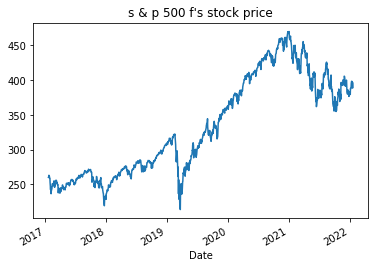

In [50]:
sp500['Close'].plot(title="s & p 500 f's stock price")

## 1. Crear, modificar o eliminar columnas

### Obtenemos retornos 

Info: [Calculate daily returns](https://towardsdatascience.com/calculate-and-plot-s-p-500-daily-returns-2ce359e014d6)

In [51]:
sp500['daily_return'] = (sp500['Close']/ sp500['Close'].shift(1)) -1
sp500.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,daily_return
Date,,,,,,,,,
2018-01-23 00:00:00-05:00,259.592941,260.400902,259.253236,260.097931,97084700,0.0,0.0,0.0,NaN
2018-01-24 00:00:00-05:00,260.768177,261.392529,258.766653,259.996948,134816100,0.0,0.0,0.0,-0.000388


### Por el momento, se descartan las columnas: Dividends	Stock Splits	Capital Gains

In [52]:
sp500.drop(columns = ['Dividends', 'Stock Splits', 'Capital Gains',], inplace = True)

In [53]:
sp500.head(2)

,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-01-23 00:00:00-05:00,259.592941,260.400902,259.253236,260.097931,97084700,NaN
2018-01-24 00:00:00-05:00,260.768177,261.392529,258.766653,259.996948,134816100,-0.000388


## 2. Filtrar datos

Filtraremos todo el mes de agosto del año pasado

In [54]:
sp500[(sp500.index >= '2022-08-01') & (sp500.index <'2022-09-01')]

,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2022-08-01 00:00:00-04:00,405.613551,409.836739,404.870033,407.219543,69997500,-0.002961
2022-08-02 00:00:00-04:00,405.583856,409.430325,403.303747,404.533020,63435400,-0.006597
2022-08-03 00:00:00-04:00,406.753613,412.087117,406.456218,410.867767,67820600,0.015659
2022-08-04 00:00:00-04:00,410.788463,411.502241,408.875152,410.590210,45656600,-0.000676
2022-08-05 00:00:00-04:00,406.119174,410.570356,406.059695,409.896240,56814900,-0.001690
2022-08-08 00:00:00-04:00,411.660855,414.010366,408.270402,409.420380,53886100,-0.001161
2022-08-09 00:00:00-04:00,408.657062,409.182480,406.674348,407.794586,44931800,-0.003971
2022-08-10 00:00:00-04:00,415.160330,416.508591,413.118138,416.359863,68665700,0.021004
2022-08-11 00:00:00-04:00,419.333933,421.277014,415.586606,416.359863,59489700,0.000000


Filtraremos aquellos días en los que el close fue mayor al open.

In [55]:
sp500[(sp500.Close > sp500.Open) ]

,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-01-23 00:00:00-05:00,259.592941,260.400902,259.253236,260.097931,97084700,NaN
2018-01-26 00:00:00-05:00,260.979353,263.164515,260.713087,263.118591,107743100,0.011578
2018-02-01 00:00:00-05:00,258.059695,259.886771,257.701609,258.527924,90102500,-0.001135
2018-02-06 00:00:00-05:00,238.659508,247.620495,237.521032,247.097153,355026800,0.019702
2018-02-09 00:00:00-05:00,239.449093,242.029044,232.214213,240.091797,283565300,0.015021
...,...,...,...,...,...,...
2023-01-10 00:00:00-05:00,387.250000,390.649994,386.269989,390.579987,65358100,0.007013
2023-01-11 00:00:00-05:00,392.230011,395.600006,391.380005,395.519989,68881100,0.012648
2023-01-12 00:00:00-05:00,396.670013,398.489990,392.420013,396.959991,90157700,0.003641


## 3. Crear subconjuntos de datos

A continuación, separaremos el dataframe en tres subconjuntos, aquellos días en los que los retornos fueron mayores a cero, otro en donde los retornos fueron menores a 0 y finalmente, en donde los retornos fueron iguales a cero.

In [56]:
positive_returns = sp500.query("daily_return > 0")
negative_returns = sp500.query("daily_return < 0")
zero_returns =   sp500.query("daily_return == 0")

In [57]:
print("Shape of positive returns df is: ", positive_returns.shape)
positive_returns.head(2)

Shape of positive returns df is:  (679, 6)


,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-01-25 00:00:00-05:00,260.896695,260.997676,259.280772,260.107086,84587300,0.000424
2018-01-26 00:00:00-05:00,260.979353,263.164515,260.713087,263.118591,107743100,0.011578


In [58]:
print("Shape of negative returns df is: ", negative_returns.shape)
negative_returns.head(2)

Shape of negative returns df is:  (575, 6)


,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-01-24 00:00:00-05:00,260.768177,261.392529,258.766653,259.996948,134816100,-0.000388
2018-01-29 00:00:00-05:00,262.521781,262.980848,261.208858,261.374115,90118300,-0.006630


In [59]:
print("Shape of zero returns df is: ", zero_returns.shape)
zero_returns.head(2)

Shape of zero returns df is:  (3, 6)


,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-05-08 00:00:00-04:00,245.662495,246.427585,244.418045,246.049667,67499200,0.0
2018-10-08 00:00:00-04:00,266.997060,268.085338,265.555353,267.713287,87742200,0.0


## 4. Crear grupos de datos

In [60]:
sp500['month'] =sp500.index.month

In [62]:
month_mean = sp500.groupby('month').mean()
month_mean

,Open,High,Low,Close,Volume,daily_return
month,,,,,,
1,341.552227,343.741632,338.978688,341.609288,9.037117e+07,0.000472
2,325.897312,328.312286,323.470601,325.891086,1.053835e+08,-0.000864
3,317.592475,320.831252,314.373423,317.753753,1.337301e+08,-0.000200
4,322.164540,324.215650,319.714853,321.948081,8.986392e+07,0.001304
5,318.287492,320.544001,315.803607,318.426053,8.883967e+07,0.000205
6,325.582060,327.326633,323.388631,325.396578,8.055543e+07,0.000331
7,330.268346,332.143914,328.616429,330.910766,6.360371e+07,0.002116
8,341.980185,343.599755,340.371576,342.126216,6.383250e+07,0.000671
9,340.726165,342.519836,338.065008,340.124168,7.932465e+07,-0.001487


In [67]:
month_mean['classification_daily_return'] = [ 1  if x>0 else 0 for x in  month_mean.daily_return ]
month_mean

,Open,High,Low,Close,Volume,daily_return,mean_daily_return,classification_daily_return
month,,,,,,,,
1,341.552227,343.741632,338.978688,341.609288,9.037117e+07,0.000472,1,1
2,325.897312,328.312286,323.470601,325.891086,1.053835e+08,-0.000864,0,0
3,317.592475,320.831252,314.373423,317.753753,1.337301e+08,-0.000200,0,0
4,322.164540,324.215650,319.714853,321.948081,8.986392e+07,0.001304,1,1
5,318.287492,320.544001,315.803607,318.426053,8.883967e+07,0.000205,1,1
6,325.582060,327.326633,323.388631,325.396578,8.055543e+07,0.000331,1,1
7,330.268346,332.143914,328.616429,330.910766,6.360371e+07,0.002116,1,1
8,341.980185,343.599755,340.371576,342.126216,6.383250e+07,0.000671,1,1
9,340.726165,342.519836,338.065008,340.124168,7.932465e+07,-0.001487,0,0


In [68]:
month_mean.groupby('classification_daily_return').mean()

,Open,High,Low,Close,Volume,daily_return,mean_daily_return
classification_daily_return,,,,,,,
0,334.216997,336.584717,331.484883,334.032205,1.019806e+08,-0.000720,0.0
1,332.538515,334.541798,330.365167,332.629519,7.982632e+07,0.000982,1.0
